In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asthma-disease-prediction/processed-data.csv


In [2]:
df=pd.read_csv('/kaggle/input/asthma-disease-prediction/processed-data.csv')

In [3]:
df.head(100)

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1
96,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0
97,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0
98,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Tiredness                316800 non-null  int64
 1   Dry-Cough                316800 non-null  int64
 2   Difficulty-in-Breathing  316800 non-null  int64
 3   Sore-Throat              316800 non-null  int64
 4   None_Sympton             316800 non-null  int64
 5   Pains                    316800 non-null  int64
 6   Nasal-Congestion         316800 non-null  int64
 7   Runny-Nose               316800 non-null  int64
 8   None_Experiencing        316800 non-null  int64
 9   Age_0-9                  316800 non-null  int64
 10  Age_10-19                316800 non-null  int64
 11  Age_20-24                316800 non-null  int64
 12  Age_25-59                316800 non-null  int64
 13  Age_60+                  316800 non-null  int64
 14  Gender_Female            316800 non-

In [5]:
df.shape

(316800, 19)

In [6]:
num_duplicates = df.duplicated().sum()
print(num_duplicates)

311040


In [7]:
df.drop_duplicates(inplace=True)
df.shape

(5760, 19)

In [8]:
print(df.Severity_Mild.value_counts())
print(df.Severity_Moderate.value_counts())
print(df.Severity_Mild.value_counts())


Severity_Mild
0    4320
1    1440
Name: count, dtype: int64
Severity_Moderate
0    4320
1    1440
Name: count, dtype: int64
Severity_Mild
0    4320
1    1440
Name: count, dtype: int64


In [9]:
df.Severity_Moderate.info()

<class 'pandas.core.series.Series'>
Index: 5760 entries, 0 to 31677
Series name: Severity_Moderate
Non-Null Count  Dtype
--------------  -----
5760 non-null   int64
dtypes: int64(1)
memory usage: 90.0 KB


In [10]:
df.Severity_None.info()

<class 'pandas.core.series.Series'>
Index: 5760 entries, 0 to 31677
Series name: Severity_None
Non-Null Count  Dtype
--------------  -----
5760 non-null   int64
dtypes: int64(1)
memory usage: 90.0 KB


In [11]:

df["Severity"] = df.apply(lambda x : 0 if x["Severity_Mild"] else 1 if x["Severity_Moderate"] else 2 if x["Severity_None"] else 3,axis=1 )

In [12]:
df['Severity'].value_counts().sum()

5760

In [13]:
df.Severity.value_counts()

Severity
0    1440
1    1440
3    1440
2    1440
Name: count, dtype: int64

In [14]:
df.shape

(5760, 20)

In [15]:
df.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None,Severity
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,1
6,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,3
9,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,2
24,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0


In [16]:
df.isnull().sum()

Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity                   0
dtype: int64

In [17]:
df.drop(columns=["Severity_Mild","Severity_Moderate","Severity_None"],inplace=True)


In [18]:
df

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1
6,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,3
9,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,2
24,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31665,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2
31668,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
31671,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
31674,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,3


In [19]:
df.columns

Index(['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat',
       'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose',
       'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59',
       'Age_60+', 'Gender_Female', 'Gender_Male', 'Severity'],
      dtype='object')

In [20]:
df["Age"] = df.apply(lambda x : 0 if x["Age_0-9"] else 1 if x["Age_10-19"] else 2 if x["Age_20-24"] else 3 if x["Age_25-59"] else 4 if x["Age_60+"] else 5,axis=1 )

In [21]:
df.drop(columns=["Age_0-9","Age_10-19","Age_20-24","Age_25-59","Age_60+"],inplace=True)

In [22]:
df.Age.value_counts()

Age
0    1152
1    1152
2    1152
3    1152
4    1152
Name: count, dtype: int64

In [23]:
df['Gender'] = df.apply(lambda x: 0 if x['Gender_Female'] else 1 if x['Gender_Male'] else 2 , axis=1)
df.drop(columns=['Gender_Female','Gender_Male'],inplace=True)

In [24]:
df

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Severity,Age,Gender
0,1,1,1,1,0,1,1,1,0,0,0,1
3,1,1,1,1,0,1,1,1,0,1,0,1
6,1,1,1,1,0,1,1,1,0,3,0,1
9,1,1,1,1,0,1,1,1,0,2,0,1
24,1,1,1,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
31665,0,0,0,0,1,0,0,0,0,2,4,2
31668,0,0,0,0,1,0,0,0,1,0,4,2
31671,0,0,0,0,1,0,0,0,1,1,4,2
31674,0,0,0,0,1,0,0,0,1,3,4,2


In [25]:
df.corr()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Severity,Age,Gender
Tiredness,1.000000e+00,3.535534e-01,4.961737e-17,-1.250000e-01,-2.132007e-01,-2.210676e-17,8.353383e-17,-6.482115e-18,-1.866861e-17,1.671303e-17,-1.443608e-15,-1.143011e-16
Dry-Cough,3.535534e-01,1.000000e+00,3.333333e-01,-2.796727e-17,-3.015113e-01,-3.157223e-17,6.121646e-17,-1.210335e-17,-1.375437e-17,5.785684e-17,-1.038987e-15,-2.690680e-16
Difficulty-in-Breathing,4.961737e-17,3.333333e-01,1.000000e+00,3.535534e-01,-3.015113e-01,8.281241e-18,2.374644e-17,-1.592546e-19,-8.509060e-18,1.427457e-17,-5.207473e-16,-2.928634e-16
Sore-Throat,-1.250000e-01,-2.796727e-17,3.535534e-01,1.000000e+00,-2.132007e-01,2.892670e-17,-8.627331e-18,9.163642e-18,4.945326e-19,-2.286613e-17,-9.838484e-16,1.820305e-17
None_Sympton,-2.132007e-01,-3.015113e-01,-3.015113e-01,-2.132007e-01,1.000000e+00,3.910991e-17,-1.318058e-17,1.598969e-17,4.217389e-18,-5.960028e-17,-7.893956e-16,6.004455e-17
Pains,-2.210676e-17,-3.157223e-17,8.281241e-18,2.892670e-17,3.910991e-17,1.000000e+00,2.581989e-01,-6.666667e-02,-2.927700e-01,8.982728e-18,6.696919e-16,1.194659e-17
Nasal-Congestion,8.353383e-17,6.121646e-17,2.374644e-17,-8.627331e-18,-1.318058e-17,2.581989e-01,1.000000e+00,2.581989e-01,-3.779645e-01,4.206516e-18,-4.197817e-17,-4.338892e-17
Runny-Nose,-6.482115e-18,-1.210335e-17,-1.592546e-19,9.163642e-18,1.598969e-17,-6.666667e-02,2.581989e-01,1.000000e+00,-2.927700e-01,-2.848834e-19,4.919932e-16,1.087383e-17
None_Experiencing,-1.866861e-17,-1.375437e-17,-8.509060e-18,4.945326e-19,4.217389e-18,-2.927700e-01,-3.779645e-01,-2.927700e-01,1.000000e+00,2.085133e-19,2.649047e-16,7.209343e-18
Severity,1.671303e-17,5.785684e-17,1.427457e-17,-2.286613e-17,-5.960028e-17,8.982728e-18,4.206516e-18,-2.848834e-19,2.085133e-19,1.000000e+00,5.295507e-16,1.476106e-16


In [26]:
import seaborn as sns

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

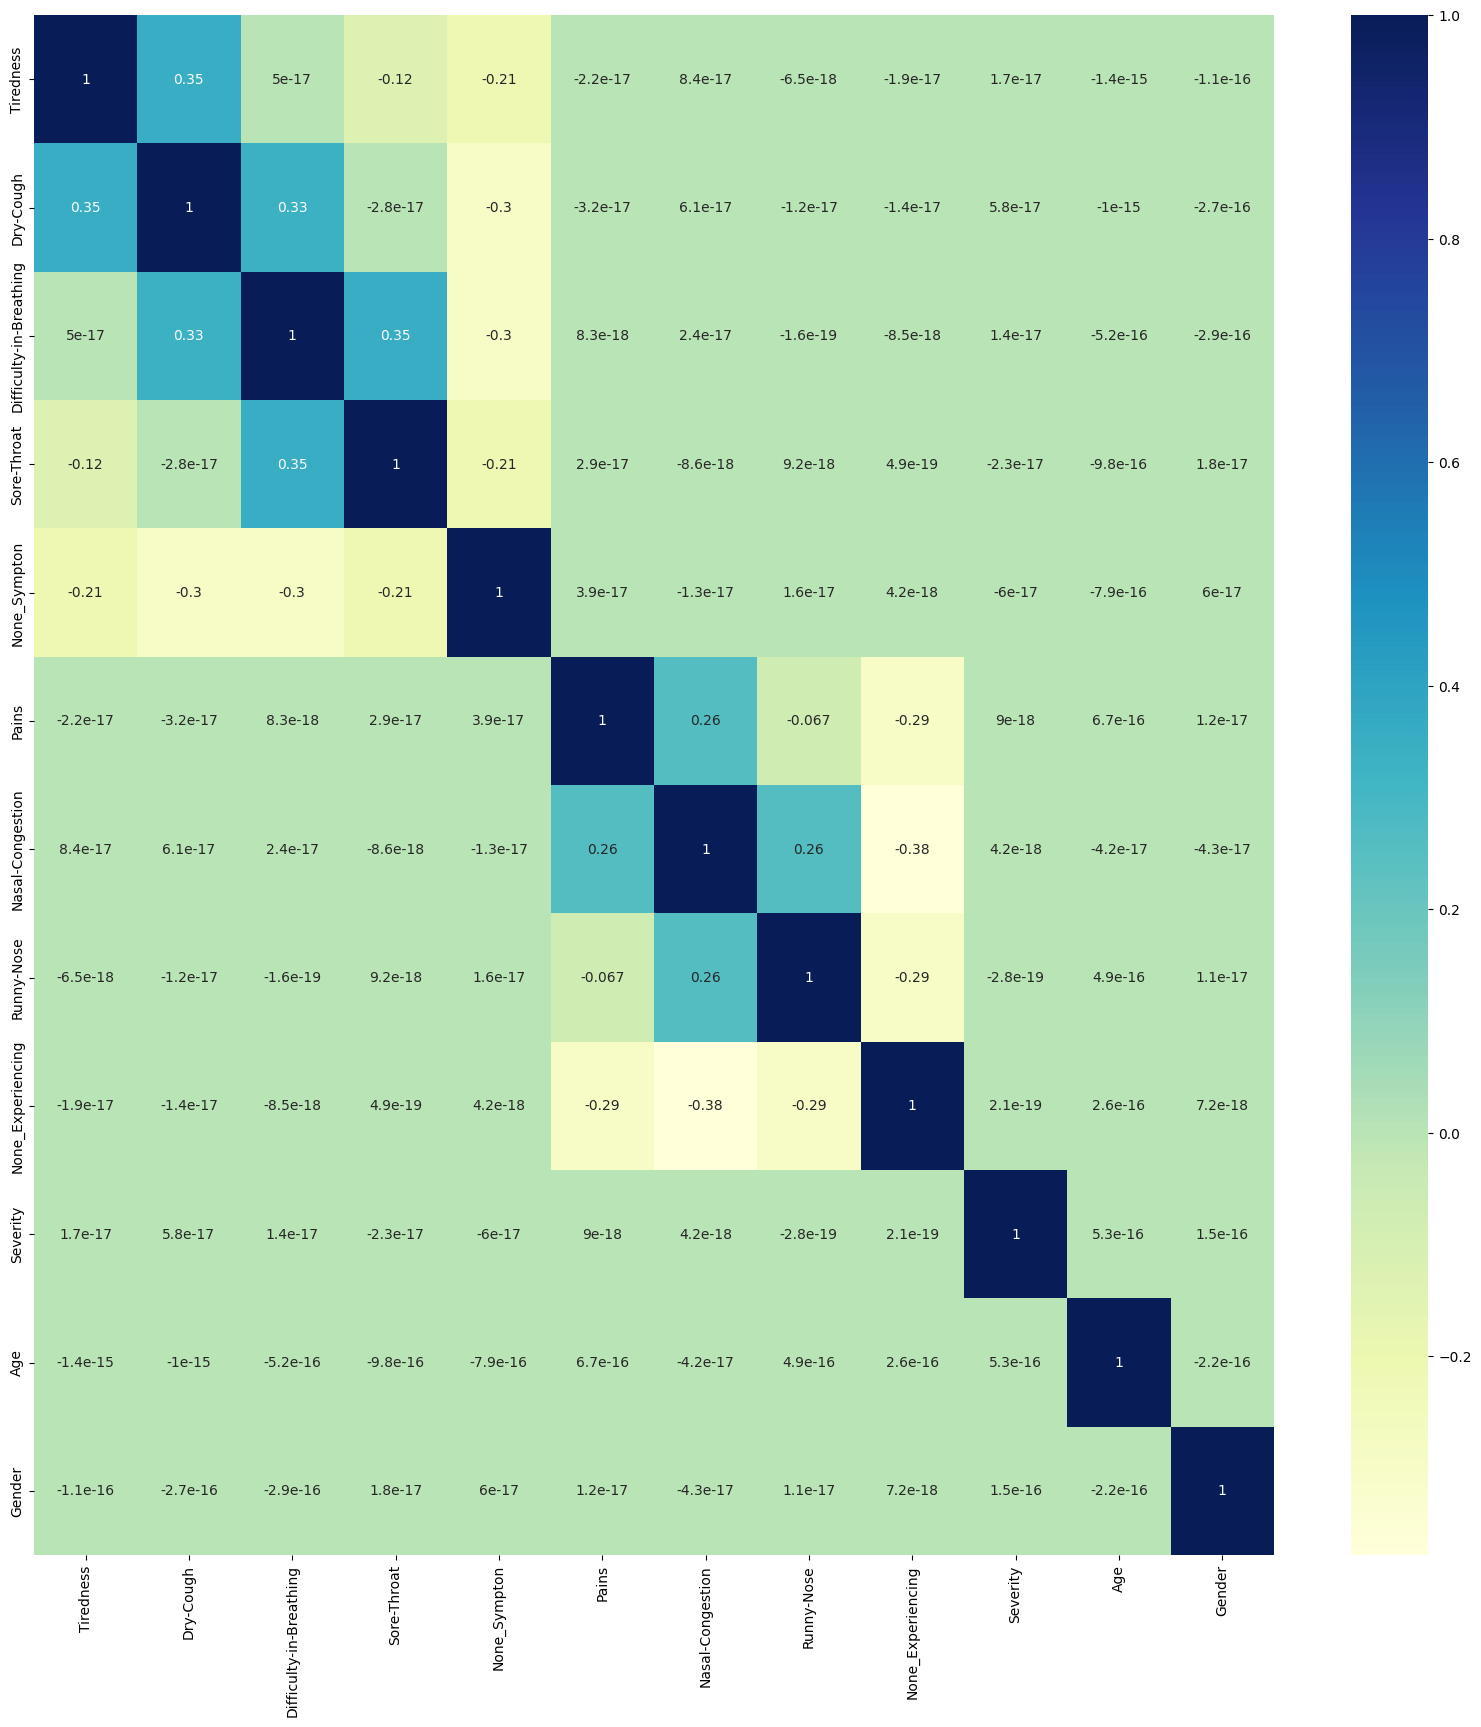

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

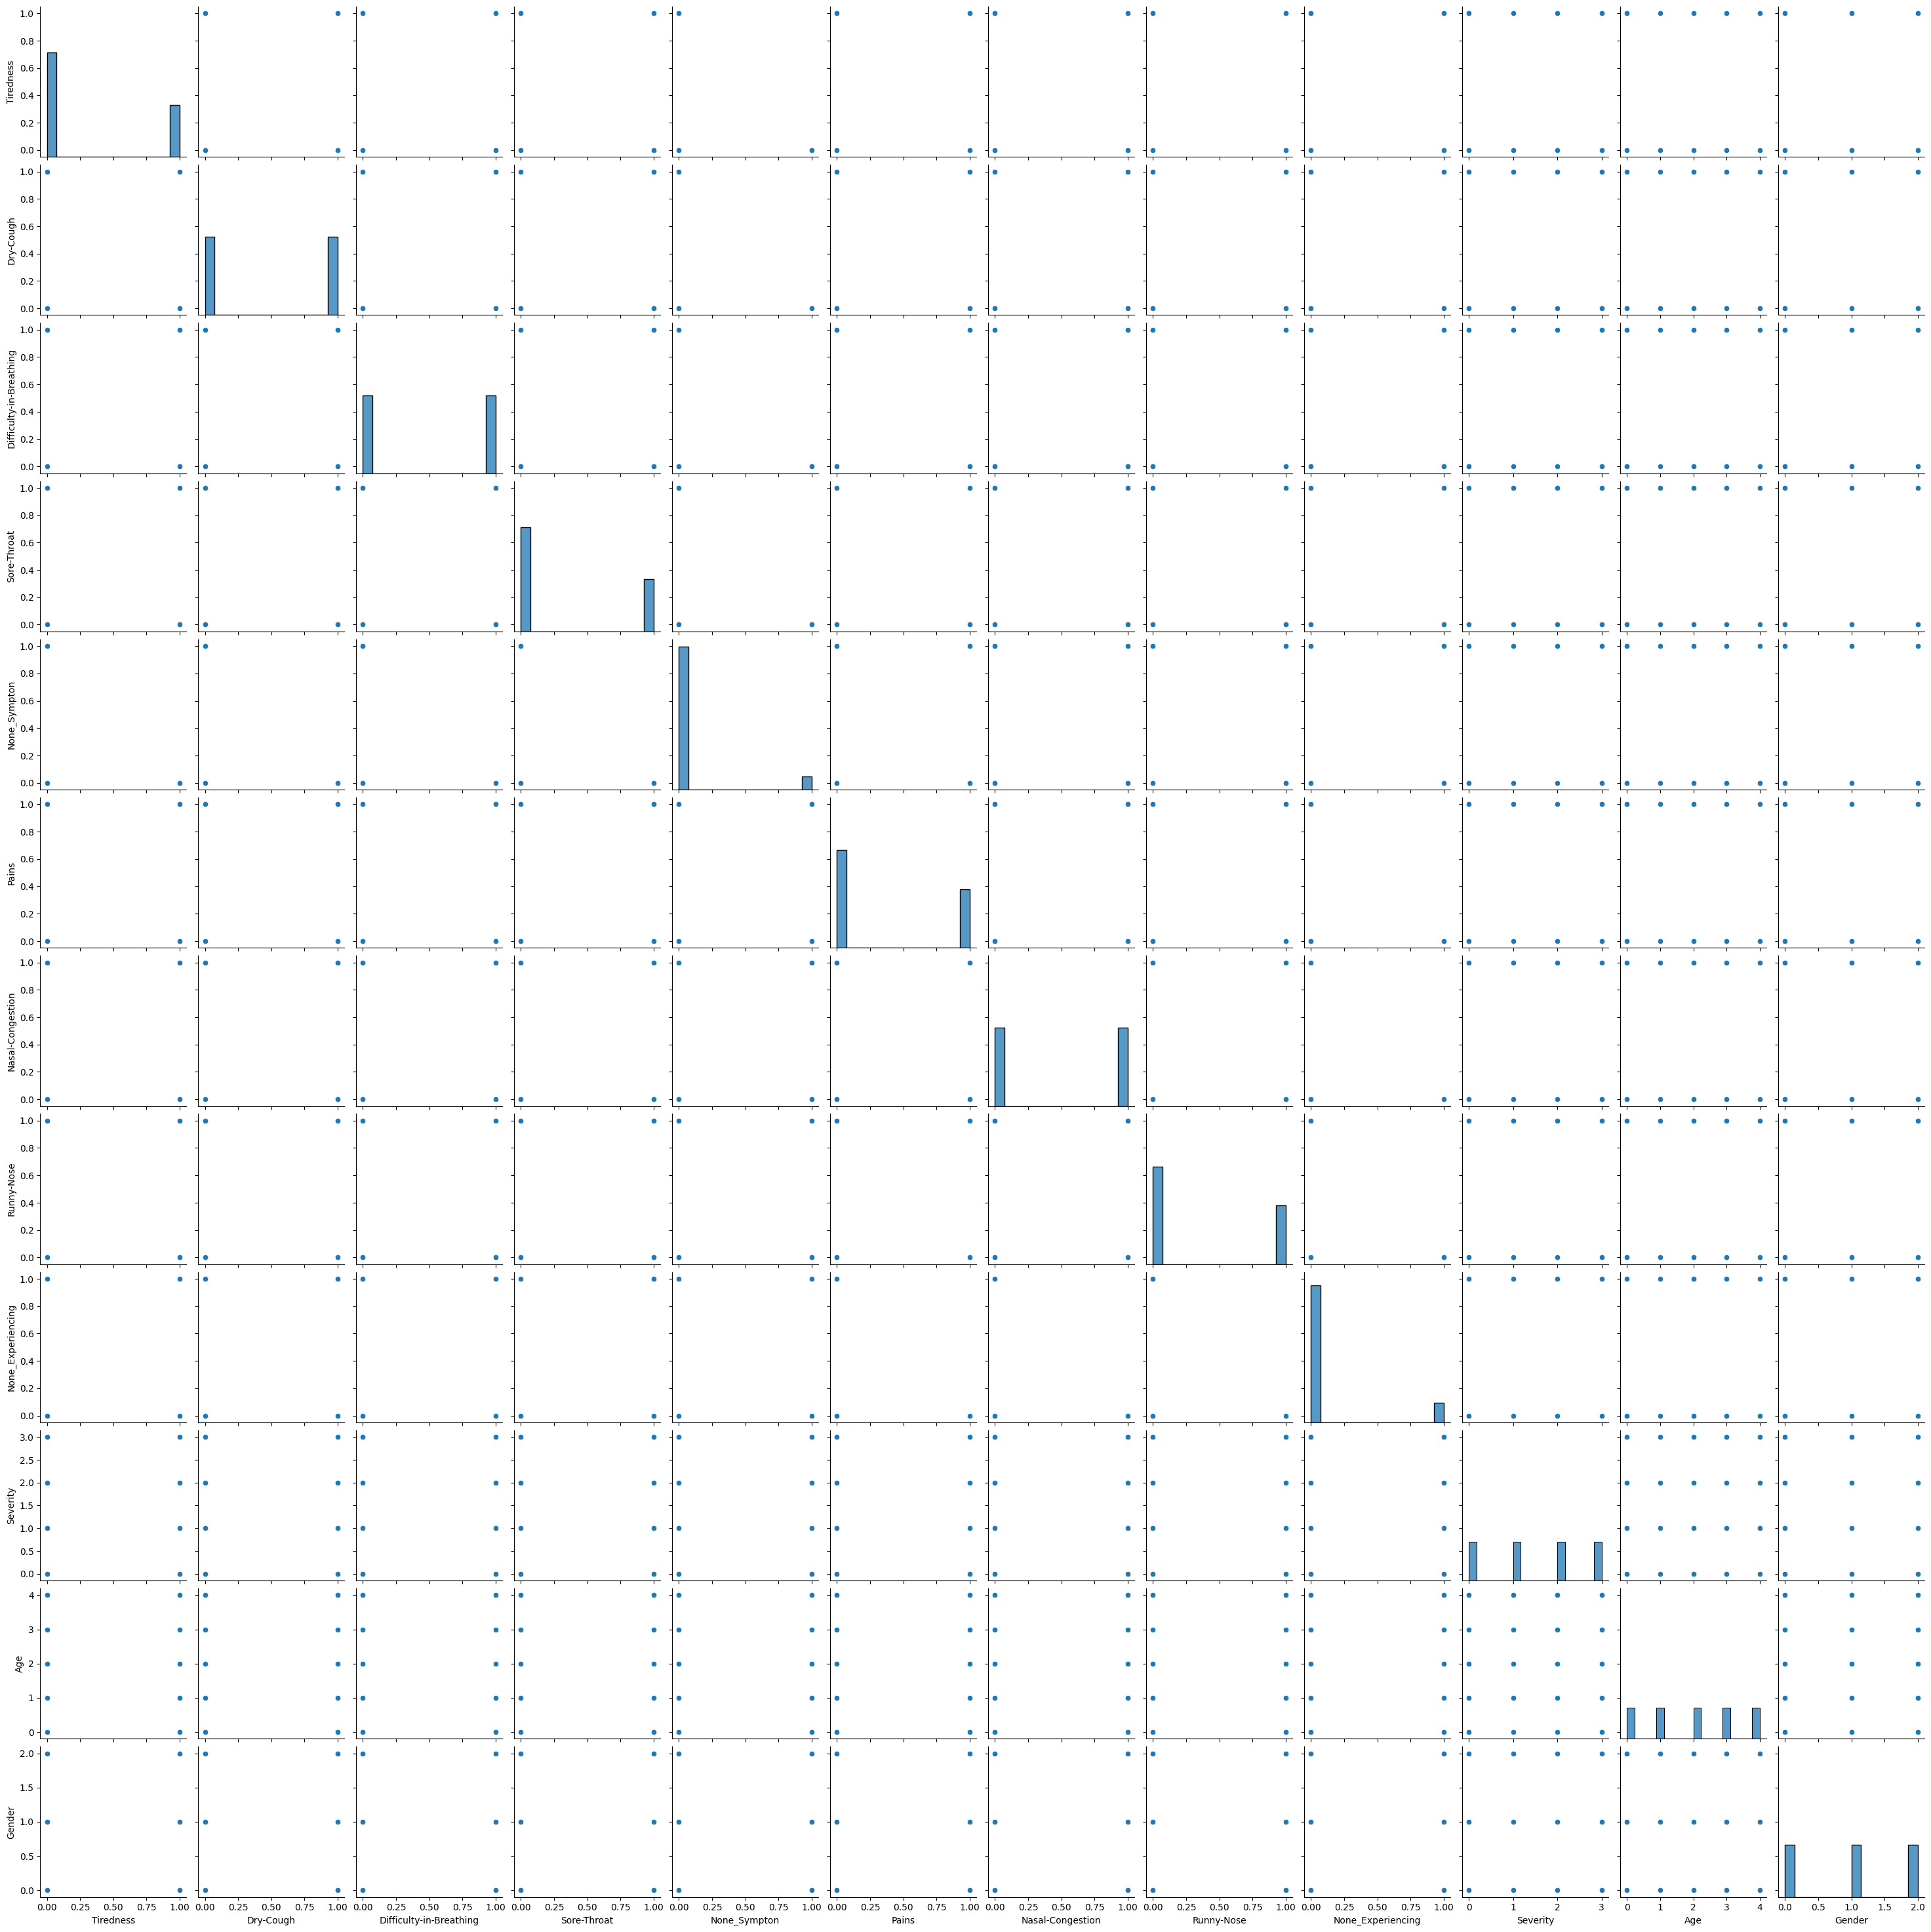

In [29]:
sns.pairplot(df)

In [30]:
df.isnull().sum()

Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
None_Experiencing          0
Severity                   0
Age                        0
Gender                     0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop(columns="Severity")
y=df.Severity

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y)

In [34]:
X_train.shape

(4320, 11)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scale=MinMaxScaler()

In [37]:
X_train_sc=scale.fit_transform(X_train,y_train)
X_test_sc=scale.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [40]:
lr.fit(X_train_sc,y_train)
knn.fit(X_train_sc,y_train)
dt.fit(X_train_sc,y_train)
rf.fit(X_train_sc,y_train)

RandomForestClassifier()

In [41]:
y_pred_lr=lr.predict(X_test_sc)
y_pred_knn=knn.predict(X_test_sc)
y_pred_dt=dt.predict(X_test_sc)
y_pred_rf=rf.predict(X_test_sc)

In [42]:
from sklearn.metrics import classification_report
print("classification_report for knn")
print(classification_report(y_test,y_pred_knn))
print("classification_report for decision tree")
print(classification_report(y_test,y_pred_dt))
print("classification_report for random forest")
print(classification_report(y_test,y_pred_rf))
print("classification_report for logistic regression")
print(classification_report(y_test,y_pred_lr))

classification_report for knn
              precision    recall  f1-score   support

           0       0.04      0.07      0.05       360
           1       0.05      0.05      0.05       360
           2       0.05      0.04      0.05       360
           3       0.04      0.02      0.03       360

    accuracy                           0.05      1440
   macro avg       0.05      0.05      0.04      1440
weighted avg       0.05      0.05      0.04      1440

classification_report for decision tree
              precision    recall  f1-score   support

           0       0.00      0.01      0.01       360
           1       0.00      0.00      0.00       360
           2       0.00      0.00      0.00       360
           3       0.00      0.00      0.00       360

    accuracy                           0.00      1440
   macro avg       0.00      0.00      0.00      1440
weighted avg       0.00      0.00      0.00      1440

classification_report for random forest
              precis

In [43]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [44]:
X_train_ov,y_train_ov=sm.fit_resample(X_train_sc,y_train)

In [45]:
print(len(X_train_sc))
print(len(X_train_ov))

4320
4320


In [46]:
lr_ov=LogisticRegression()
knn_ov=KNeighborsClassifier()
dt_ov=DecisionTreeClassifier()
rf_ov=RandomForestClassifier()

In [47]:
lr_ov.fit(X_train_ov,y_train_ov)
knn_ov.fit(X_train_ov,y_train_ov)
dt_ov.fit(X_train_ov,y_train_ov)
rf_ov.fit(X_train_ov,y_train_ov)

y_pred_lr_ov=lr_ov.predict(X_test_sc)
y_pred_knn_ov=knn_ov.predict(X_test_sc)
y_pred_dt_ov=dt_ov.predict(X_test_sc)
y_pred_rf_ov=rf_ov.predict(X_test_sc)

In [48]:
print(classification_report(y_test,y_pred_knn_ov))
print(classification_report(y_test,y_pred_dt_ov))
print(classification_report(y_test,y_pred_rf_ov))
print(classification_report(y_test,y_pred_lr_ov))

              precision    recall  f1-score   support

           0       0.04      0.07      0.05       360
           1       0.05      0.05      0.05       360
           2       0.05      0.04      0.05       360
           3       0.04      0.02      0.03       360

    accuracy                           0.05      1440
   macro avg       0.05      0.05      0.04      1440
weighted avg       0.05      0.05      0.04      1440

              precision    recall  f1-score   support

           0       0.00      0.01      0.01       360
           1       0.00      0.00      0.00       360
           2       0.00      0.00      0.00       360
           3       0.00      0.00      0.00       360

    accuracy                           0.00      1440
   macro avg       0.00      0.00      0.00      1440
weighted avg       0.00      0.00      0.00      1440

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       360
           1       0.